In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vg_data=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
vg_data.shape

(16719, 16)

In [3]:
vg_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [5]:
vg_data.loc[vg_data.Name=='Grand Theft Auto V']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [6]:
vg_data.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [7]:
vg_data=vg_data.dropna(subset=['Name','Year_of_Release','Genre','Publisher'])
vg_data.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [8]:
vg_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,7.126900,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,1.498886,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


Text(0.5, 1.0, 'Heatmap of Video Games Dataset')

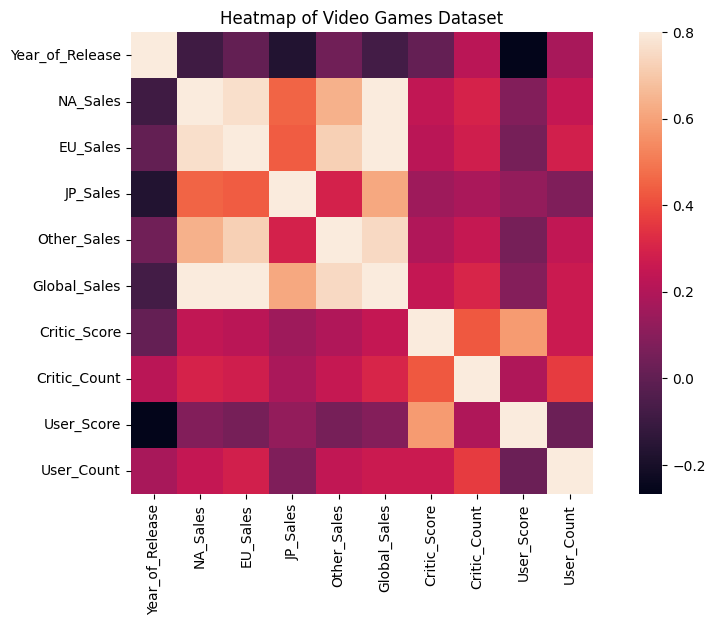

In [9]:
corr_mat=vg_data.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(corr_mat,vmax=0.8,square=True)
plt.title('Heatmap of Video Games Dataset')

In [10]:
vg_data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,0.264129,0.146034,0.078623,0.047670,0.536708
std,0.819028,0.507134,0.311348,0.188156,1.559885
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.530000


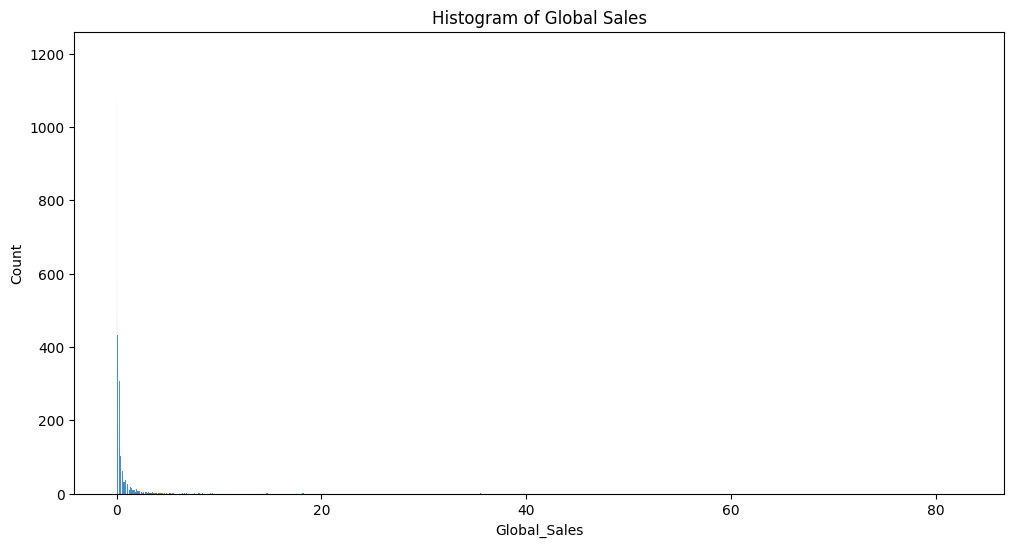

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(vg_data['Global_Sales'],binwidth=0.01)
plt.title('Histogram of Global Sales')
plt.show()

In [12]:
vg_data.sort_values('Global_Sales',ascending=False)[:10]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


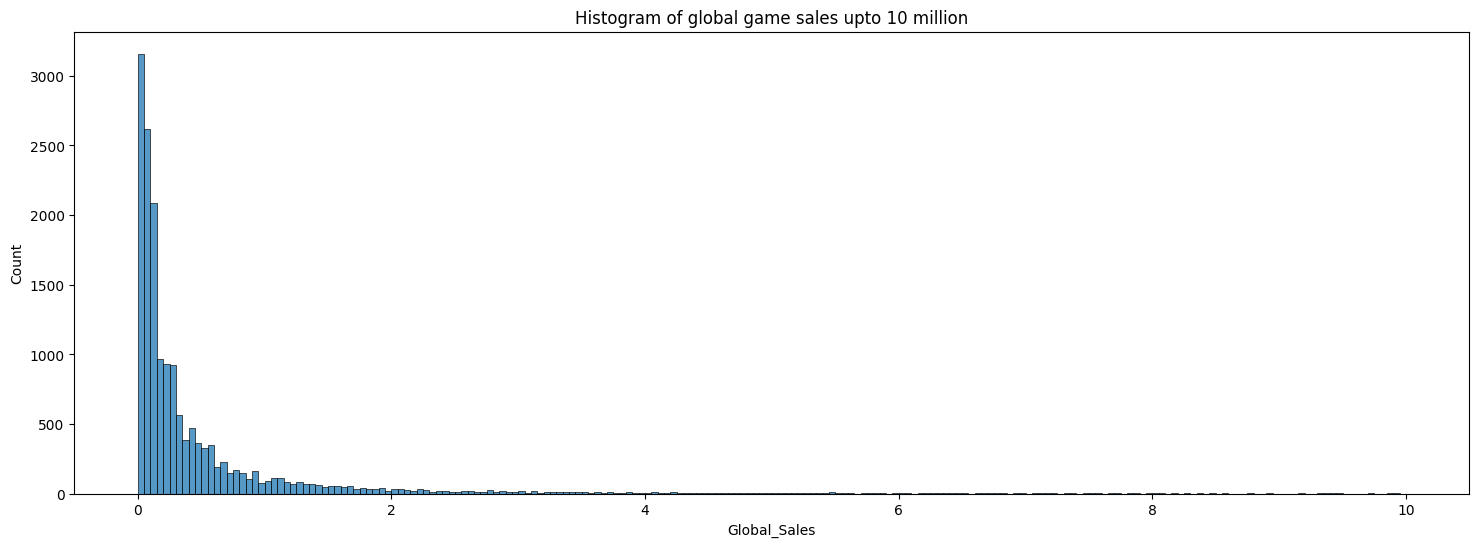

In [13]:
plt.figure(figsize=(18,6))
sns.histplot(vg_data['Global_Sales'],binwidth=0.05,binrange=[0,10])
plt.title('Histogram of global game sales upto 10 million')
plt.show()

In [14]:
vg_data['Global_Sales'].skew()

17.28599301527773

In [15]:
vg_data['Global_Sales'].kurt()

596.4311261407373

In [16]:
vg_data.value_counts('Platform')

,count
Platform,
PS2,2127
DS,2122
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,952
XB,803


<ipython-input-17-14629eedf256>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Platform',data=vg_data,order=vg_data.value_counts('Platform').index,palette='viridis')


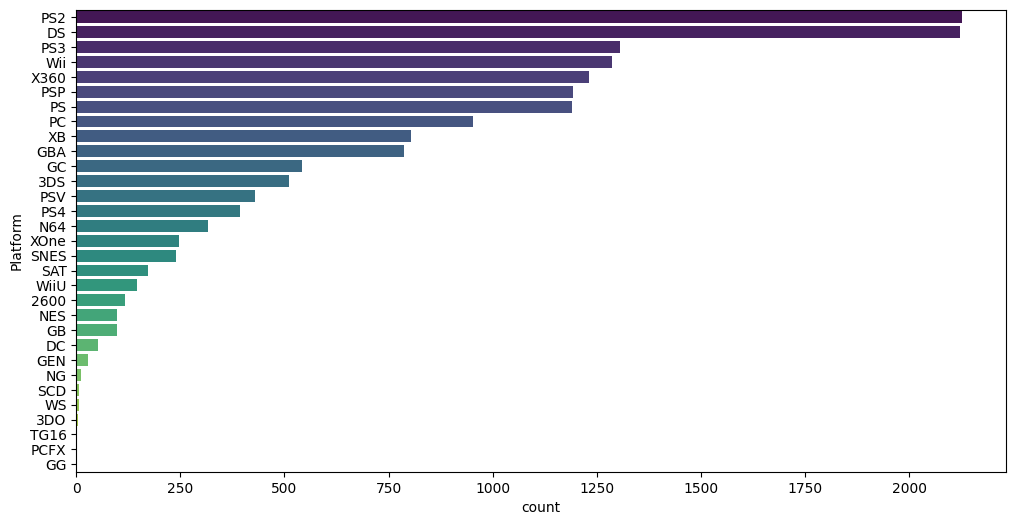

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(y='Platform',data=vg_data,order=vg_data.value_counts('Platform').index,palette='viridis')
plt.show()

In [18]:
vg_data.groupby('Platform')['Global_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
2600,116.0,0.746293,0.955571,0.07,0.3050,0.475,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503750,1.441374,0.01,0.0500,0.120,0.3400,14.60
DC,52.0,0.307115,0.469912,0.02,0.0775,0.135,0.2975,2.42
DS,2122.0,0.378761,1.435772,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622887,5.390733,0.06,0.3000,1.180,2.1800,31.37
GBA,786.0,0.388830,0.912071,0.01,0.0600,0.160,0.3900,15.85
GC,542.0,0.363727,0.693107,0.01,0.0700,0.150,0.3700,7.07
GEN,27.0,1.050370,1.492217,0.03,0.0700,0.150,1.7100,6.03


<ipython-input-32-9870eacd5082>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vg_data.groupby('Platform').sum().sort_values('Global_Sales',ascending=False),x='Global_Sales',y='Platform',palette='viridis')


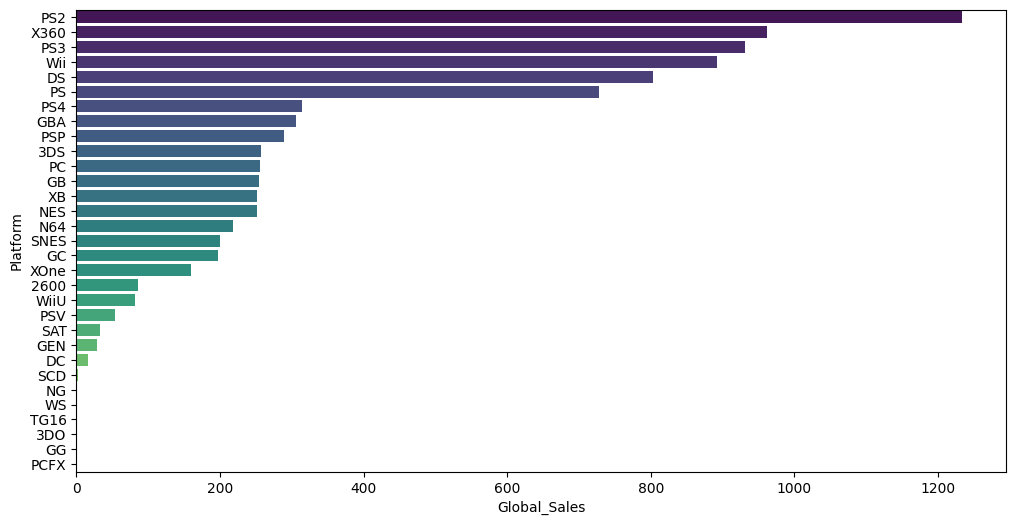

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=vg_data.groupby('Platform').sum().sort_values('Global_Sales',ascending=False),x='Global_Sales',y='Platform',palette='viridis')
plt.title('Total Global Sales by Platform')
plt.show()

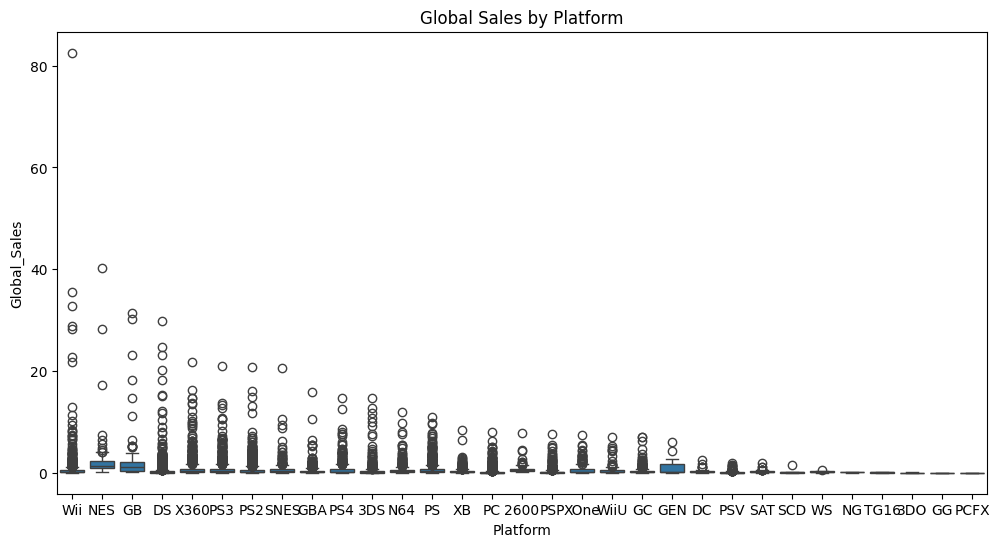

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=vg_data,x='Platform',y='Global_Sales')
plt.title('Global Sales by Platform')
plt.show()

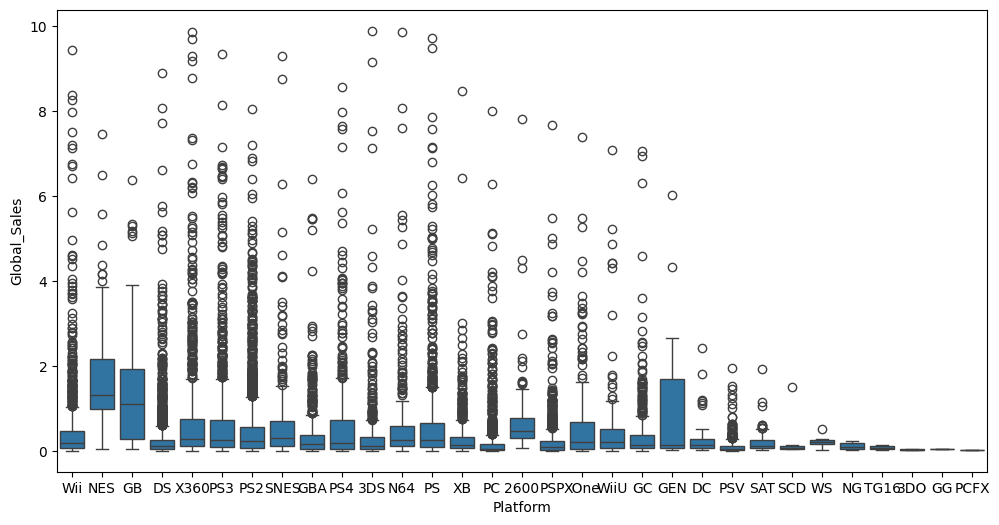

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(data=vg_data[vg_data['Global_Sales']<=10],x='Platform',y='Global_Sales',order=vg_data.groupby('Platform',sort=False)['Global_Sales'].max().index)
plt.show()

In [119]:
multiple_releases=vg_data[vg_data['Name'].duplicated(keep=False)].value_counts('Name')
print(multiple_releases)

Name
Need for Speed: Most Wanted                  12
LEGO Marvel Super Heroes                      9
FIFA 14                                       9
Ratatouille                                   9
Madden NFL 07                                 8
                                             ..
L.A. Rush                                     2
L.A. Noire                                    2
Kyokugen Dasshutsu ADV: Zennin Shiboudesu     2
Kuroko's Basketball: Miracle Game             2
uDraw Studio: Instant Artist                  2
Name: count, Length: 2749, dtype: int64


In [87]:
vg_data[vg_data['Name']=='FIFA 14']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
126,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.24,0.07,1.37,6.47,86.0,37.0,4.3,576.0,EA Canada,E
271,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2.89,0.01,0.40,4.22,84.0,41.0,4.2,435.0,EA Canada,E
469,FIFA 14,PS4,2013.0,Sports,Electronic Arts,0.61,1.85,0.11,0.44,3.01,87.0,26.0,6.3,616.0,EA Canada,E
1753,FIFA 14,XOne,2013.0,Sports,Electronic Arts,0.41,0.66,0.00,0.09,1.16,88.0,22.0,5.8,328.0,EA Canada,E
4699,FIFA 14,PSV,2013.0,Sports,Electronic Arts,0.08,0.23,0.01,0.09,0.41,NaN,NaN,1.8,69.0,EA Canada,E
4809,FIFA 14,PC,2013.0,Sports,Electronic Arts,0.01,0.36,0.00,0.03,0.40,87.0,6.0,4.6,441.0,EA Canada,E
4985,FIFA 14,Wii,2013.0,Sports,Electronic Arts,0.00,0.36,0.00,0.02,0.38,NaN,NaN,4.3,19.0,EA Canada,E
6872,FIFA 14,3DS,2013.0,Sports,Electronic Arts,0.00,0.22,0.00,0.01,0.24,NaN,NaN,NaN,NaN,NaN,NaN
7876,FIFA 14,PSP,2013.0,Sports,Electronic Arts,0.00,0.15,0.00,0.04,0.19,NaN,NaN,3.4,23.0,EA Canada,E


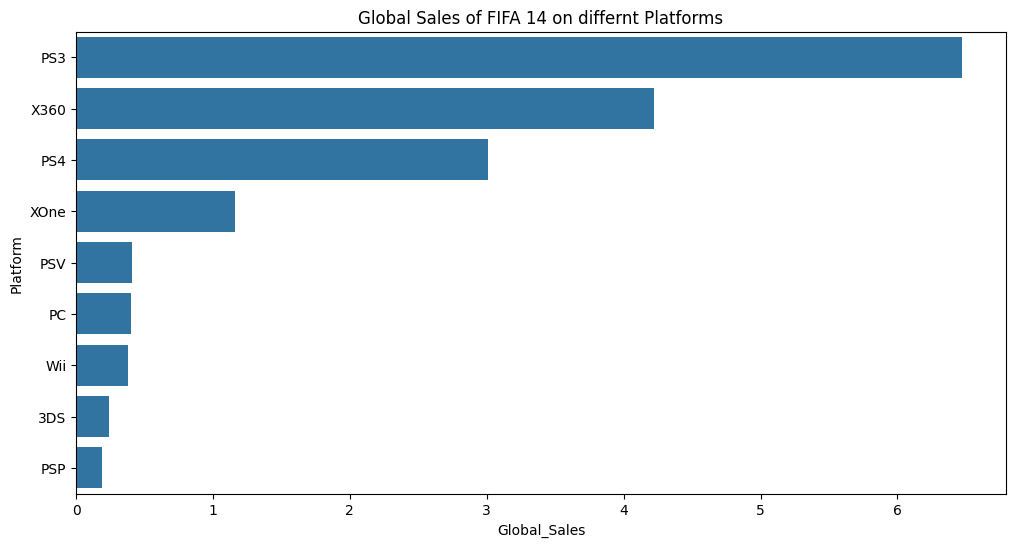

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(data=vg_data[vg_data['Name']=='FIFA 14'],x='Global_Sales',y='Platform')
plt.title('Global Sales of FIFA 14 on differnt Platforms')
plt.show()

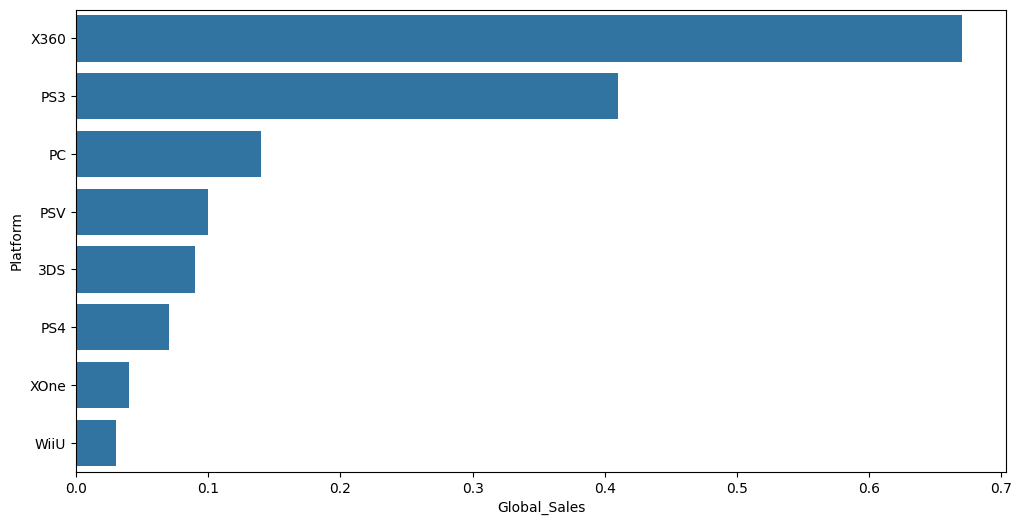

In [90]:
plt.figure(figsize=(12,6))
sns.barplot(data=vg_data[vg_data['Name']=='Terraria'],x='Global_Sales',y='Platform')
plt.show()

In [98]:
vg_data['Platform'].nunique()

31

In [129]:
vg_data['Genre'].value_counts()

,count
Genre,
Action,3307
Sports,2306
Misc,1697
Role-Playing,1483
Shooter,1296
Adventure,1291
Racing,1225
Platform,878
Simulation,855


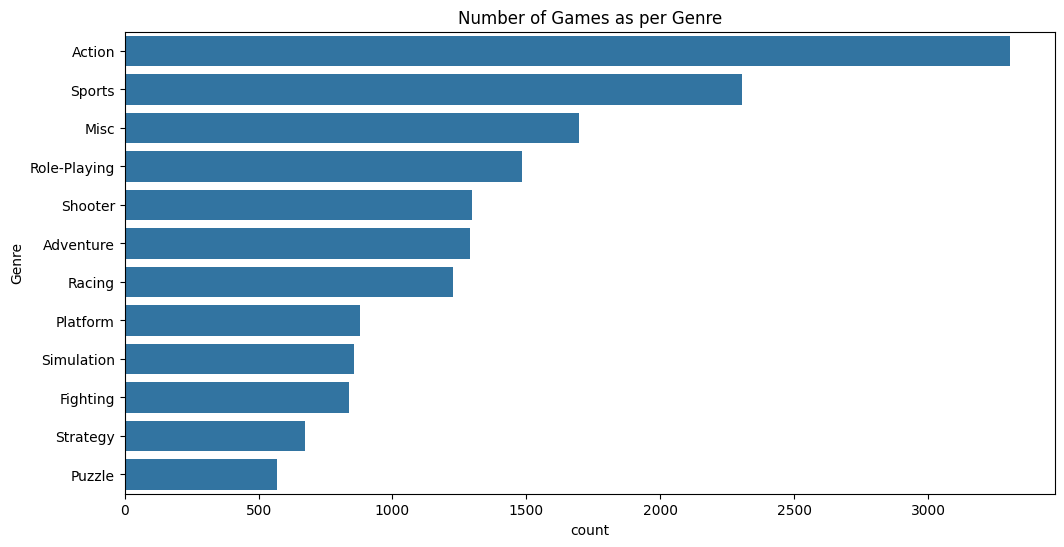

In [133]:
plt.figure(figsize=(12,6))
sns.countplot(data=vg_data,y='Genre',order=vg_data['Genre'].value_counts().index)
plt.title('Number of Games as per Genre')
plt.show()

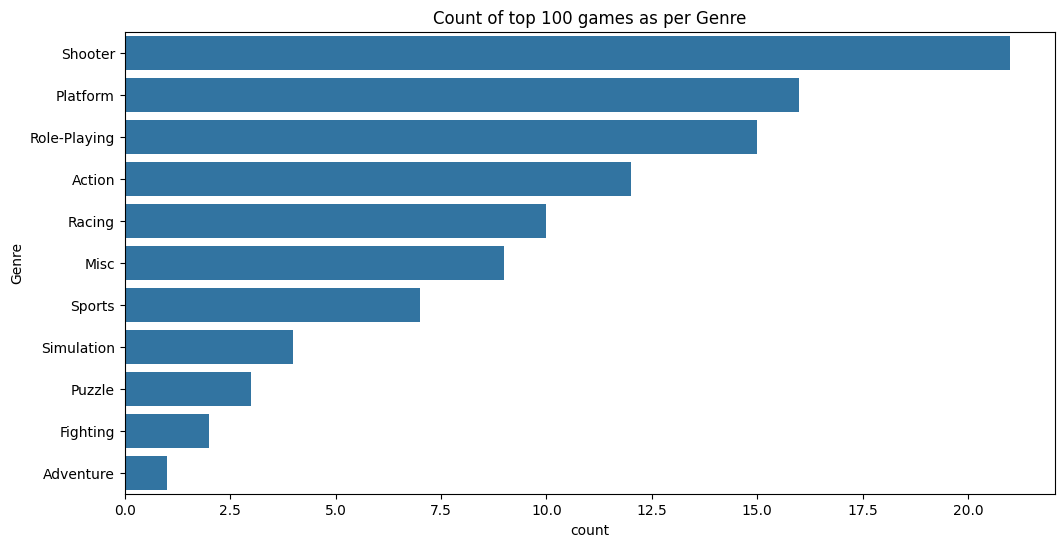

In [141]:
top_hundred=vg_data.sort_values('Global_Sales',ascending=False).head(100)

plt.figure(figsize=(12,6))
sns.countplot(data=top_hundred,y='Genre',order=top_hundred.value_counts('Genre').index)
plt.title('Count of top 100 games as per Genre')
plt.show()

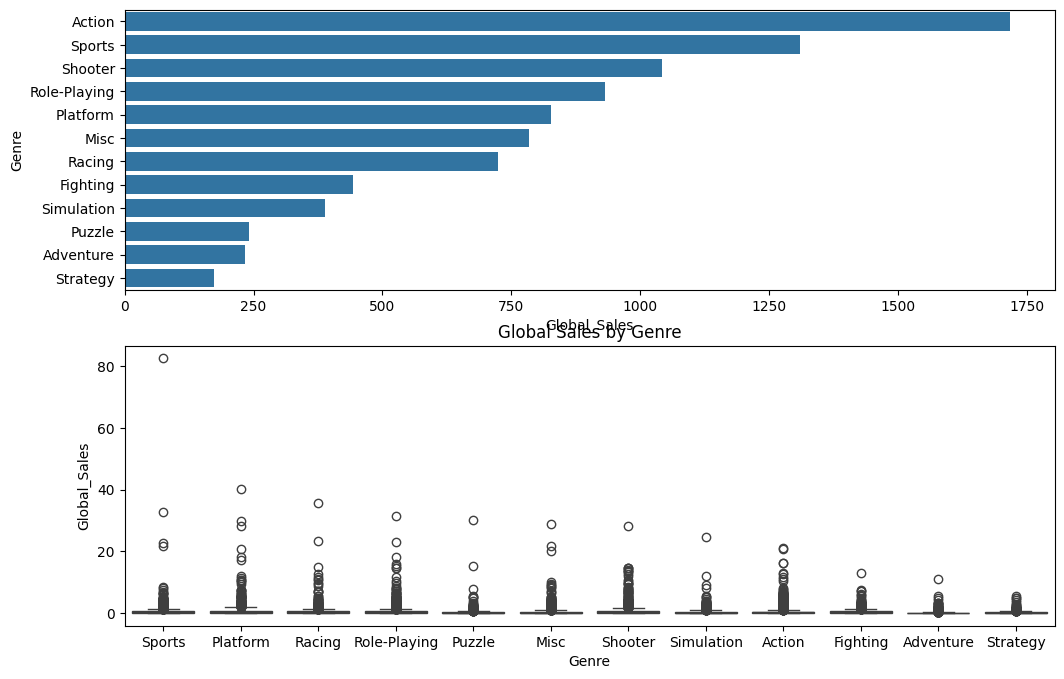

In [179]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.barplot(data=vg_data.groupby('Genre').sum(),x='Global_Sales',y='Genre',order=vg_data.groupby('Genre').sum().sort_values('Global_Sales', ascending=False).index)
plt.subplot(2,1,2)
sns.boxplot(data=vg_data, y='Global_Sales', x='Genre')

plt.title('Global Sales by Genre')
plt.show()

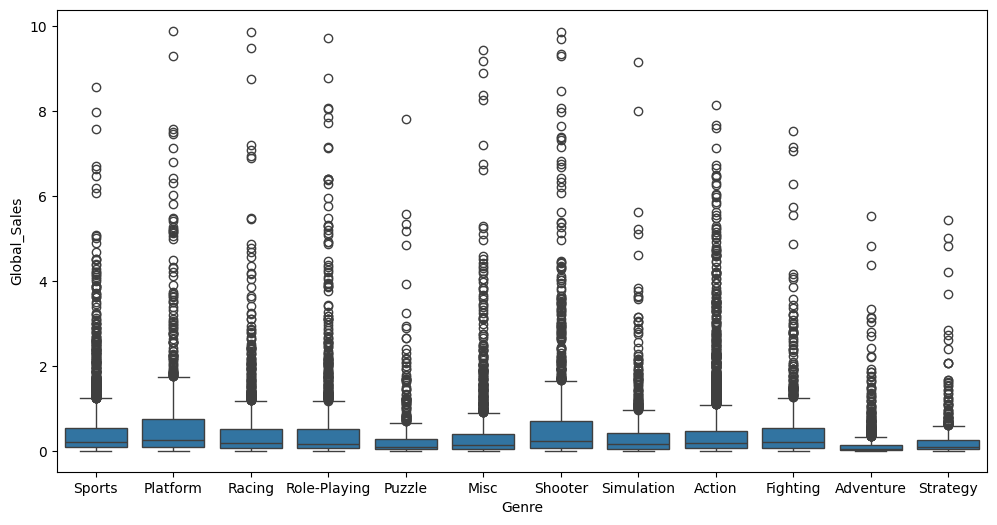

In [183]:
plt.figure(figsize=(12,6))
sns.boxplot(data=vg_data[vg_data['Global_Sales']<=10],x='Genre',y='Global_Sales',order=vg_data.groupby('Genre',sort=False)['Global_Sales'].max().index)
plt.show()

In [190]:
vg_data['Rating'].value_counts()

,count
Rating,
E,3921
T,2904
M,1536
E10+,1393
EC,8
K-A,3
AO,1
RP,1


In [191]:
vg_data.replace(['K-A','EC'],'E',inplace=True)

In [192]:
vg_data['Rating'].value_counts()

,count
Rating,
E,3932
T,2904
M,1536
E10+,1393
AO,1
RP,1


In [193]:
vg_data[vg_data['Rating']=='RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14272,Supreme Ruler: Cold War,PC,2011.0,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,RP


In [195]:
vg_data.loc[14272,'Rating']='E10+'

In [199]:
vg_data['Rating'].value_counts()

,count
Rating,
E,3932
T,2904
M,1537
E10+,1394


In [197]:
vg_data[vg_data['Rating']=='AO']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO


In [198]:
vg_data.loc[875,'Rating'] = 'M'

In [200]:
vg_data['Rating'].value_counts()

,count
Rating,
E,3932
T,2904
M,1537
E10+,1394


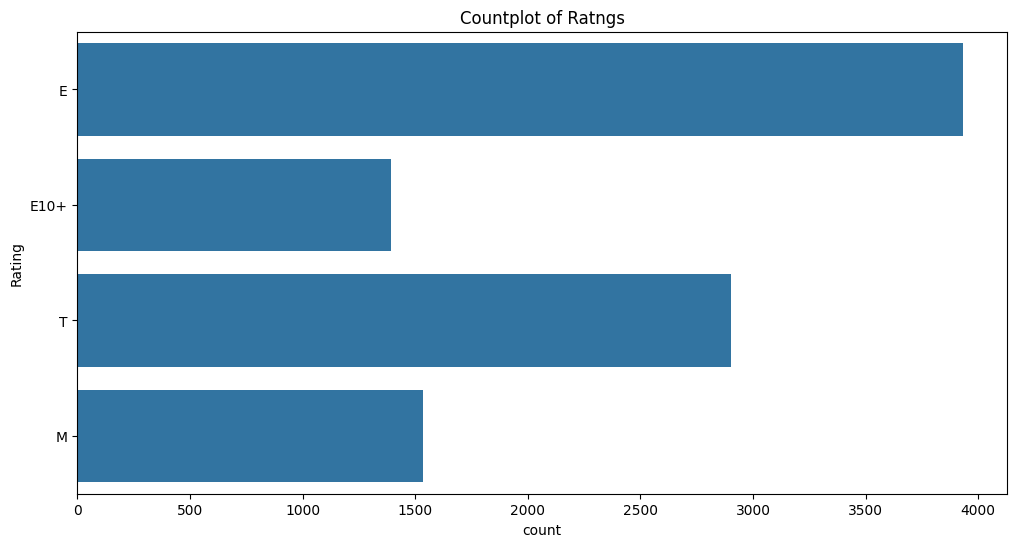

In [204]:
rating_order=['E','E10+','T','M']

plt.figure(figsize=(12,6))
sns.countplot(data=vg_data,y='Rating',order=rating_order)
plt.title('Countplot of Ratngs')
plt.show()

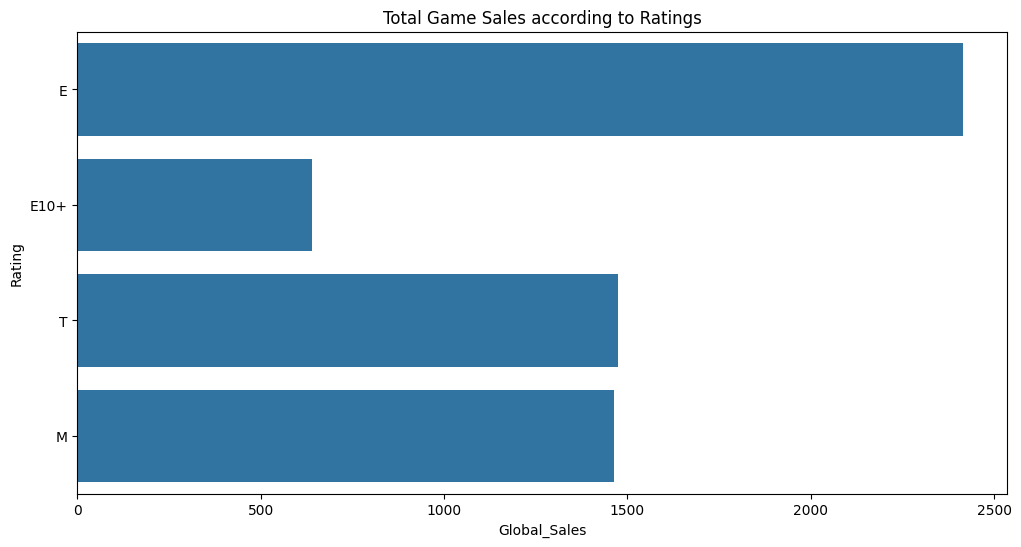

In [210]:
plt.figure(figsize=(12,6))
sns.barplot(data=vg_data.groupby('Rating').sum(),x='Global_Sales',y='Rating',order=rating_order)
plt.title('Total Game Sales according to Ratings')
plt.show()

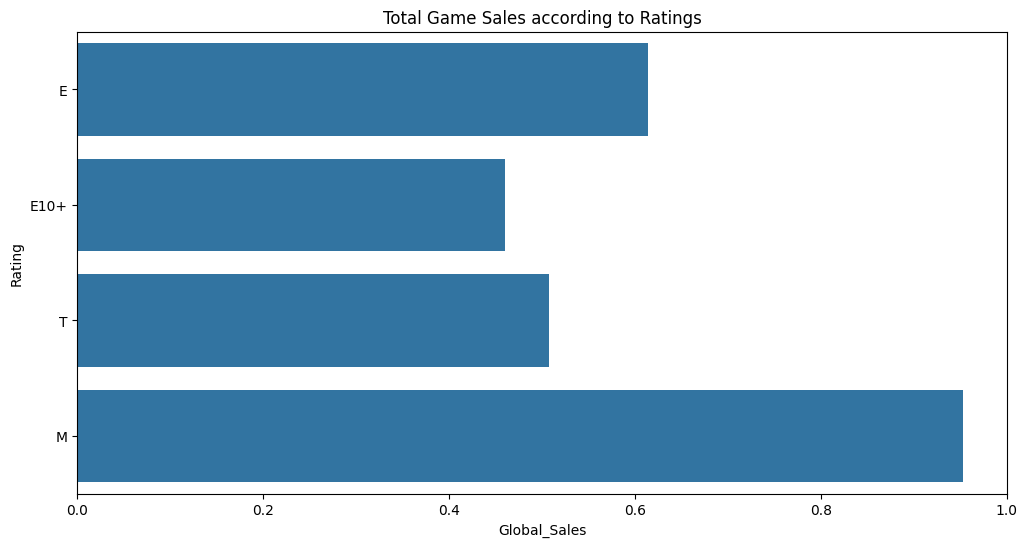

In [220]:
x=vg_data.groupby('Rating')['Global_Sales'].mean()
y=pd.DataFrame(x)

plt.figure(figsize=(12,6))
sns.barplot(data=y,x='Global_Sales',y='Rating',order=rating_order)
plt.title('Total Game Sales according to Ratings')
plt.show()

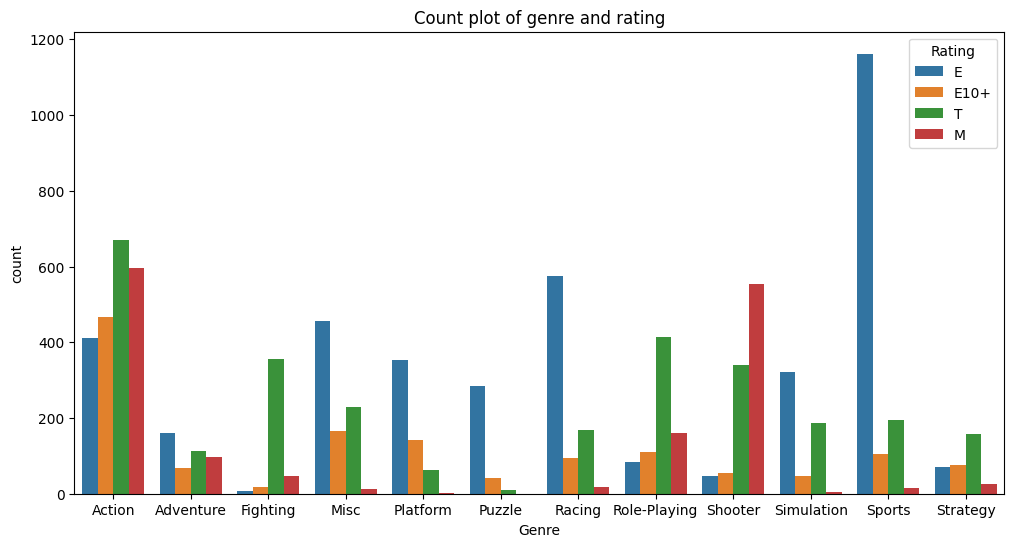

In [229]:
plt.figure(figsize=(12,6))
plt.title("Count plot of genre and rating")
sns.countplot(data=vg_data, x='Genre', hue='Rating', order=sorted(vg_data['Genre'].dropna().unique()), hue_order=rating_order)
plt.show()

In [226]:
vg_data['Developer'].value_counts()

,count
Developer,
Ubisoft,201
EA Sports,169
EA Canada,164
Konami,158
Capcom,137
...,...
Zombie,1
Le Cortex,1
Hypnos,1


In [227]:
sum(vg_data['Developer']value_counts()==1)

645

In [228]:
sum(vg_data['Developer'].value_counts()<=3)

1092

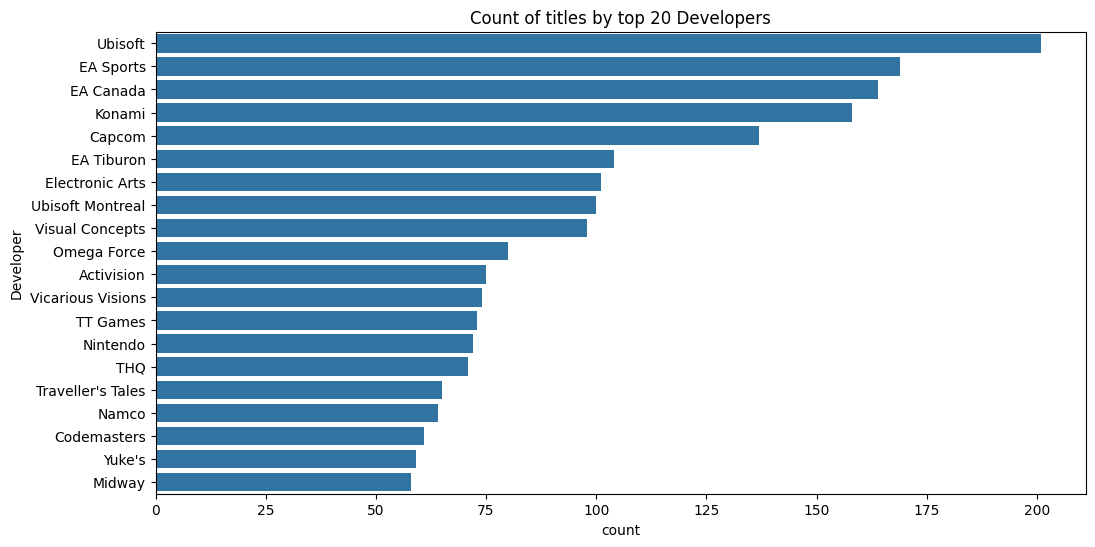

In [233]:
plt.figure(figsize=(12,6))
sns.countplot(data=vg_data,y='Developer',order=vg_data['Developer'].value_counts().head(20).index)
plt.title('Count of titles by top 20 Developers')
plt.show()

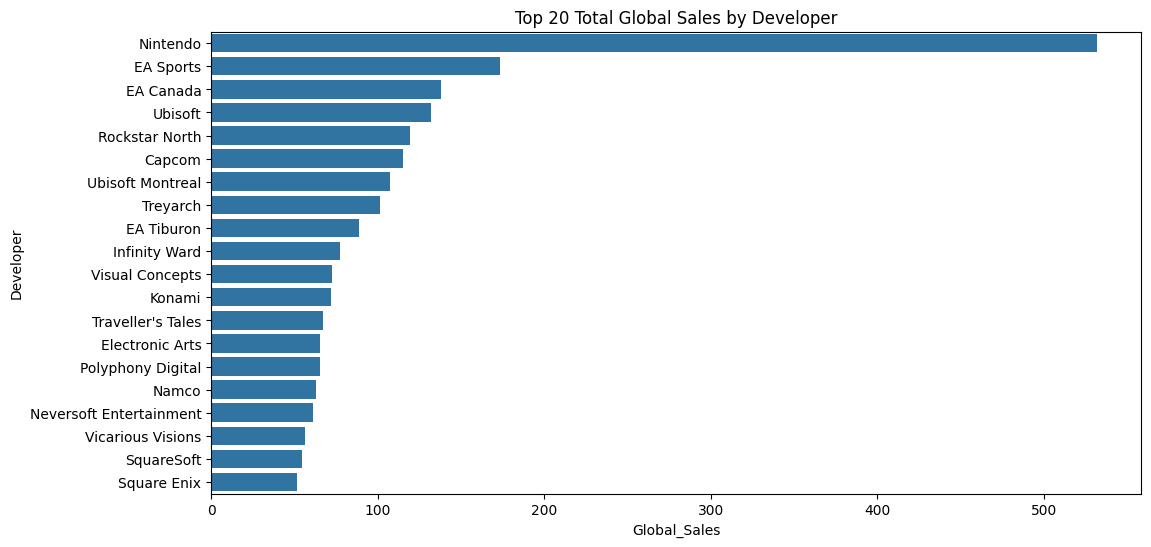

In [242]:
h=vg_data.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False).head(20)
top_20=pd.DataFrame(h)

plt.figure(figsize=(12,6))
sns.barplot(data=top_20,x='Global_Sales',y='Developer')
plt.title('Top 20 Total Global Sales by Developer')
plt.show()

In [265]:
vg_data['Critic_Score'].describe()

,Critic_Score
count,7982.000000
mean,68.997119
std,13.918755
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000


In [266]:
vg_data['User_Score'].describe()

,User_Score
count,7461.000000
mean,7.126900
std,1.498886
min,0.000000
25%,6.400000
50%,7.500000
75%,8.200000
max,9.700000


In [274]:
vg_data['Year_of_Release'].describe()

,Year_of_Release
count,16416.000000
mean,2006.489888
std,5.881148
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000
